Developing a deep learning model to achive near state of the art performance on the MNIST digit recognition task in Python 3 using the Keras deep learning library.

### Loading the MNIST dataset from Keras

In [1]:
# importing 3 party libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [3]:
# configuring the convolutional kernels to have the shape (depth, input_depth, rows, columns)

In [4]:
K.set_image_dim_ordering('th')

In [5]:
# initializing the seed for results reproducibility

In [6]:
seed = 10
np.random.seed(seed)

In [7]:
# loading the mnist dataset from the keras library

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
# 2*2 subplots of the first four grey-scale images

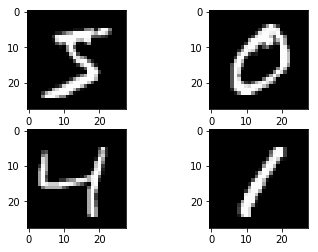

In [10]:
for i in range(4):
    plt.subplot(221+i)
    plt.imshow(x_train[i], cmap=plt.get_cmap(name='gray'))
plt.show()

### Data Preprocessing

We are using a pixel dimension equal 1 because these are greyscale images. For RGB images we would need to set it at 3 as if it were 3 colour image input.

In [11]:
# reshape to [samples][pixel][width][height] and forcing the pixel precision to 32 bits

In [12]:
X_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], x_train.shape[2]).astype('float32')
X_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1], x_test.shape[2]).astype('float32')

In [13]:
# converting class vectors to binary class vectors

In [14]:
Y_train = np_utils.to_categorical(y_train, dtype='float32')
Y_test = np_utils.to_categorical(y_test, dtype='float32')
num_classes = Y_train.shape[1]

In [15]:
num_classes

10

### Creating a Convolutional Neural Network (CNN) model

In [16]:
X_train.shape[1:]

(1, 28, 28)

In [17]:
def baseline_cnn_model(X):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), kernel_initializer='normal', input_shape=X.shape[1:], activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), kernel_initializer='normal', activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

model = baseline_cnn_model(X_train)

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 28, 28)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 14, 14)        4335      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 7, 7)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 7, 7)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 735)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               94208     
__________

### Compiling then fitting the model

In [19]:
# Creating the callbacks to help recording the history dictionary, 
# reducing the LR and early stopping if there is no performance improvements respectively

In [20]:
epochs = 20
BATCH = 200

In [21]:
class LossHistory(Callback):
    # For recording training history
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

callback = Callback()
history = LossHistory()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=2)
lrplateau = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, verbose=2)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
hist = model.fit(X_train, Y_train, batch_size=BATCH, epochs=epochs, verbose=2, 
                 validation_data=(X_test, Y_test), callbacks=[early_stopping, history, lrplateau])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 240s - loss: 0.5434 - acc: 0.8327 - val_loss: 0.0808 - val_acc: 0.9756
Epoch 2/20
 - 264s - loss: 0.1300 - acc: 0.9620 - val_loss: 0.0490 - val_acc: 0.9850
Epoch 3/20
 - 259s - loss: 0.0904 - acc: 0.9737 - val_loss: 0.0437 - val_acc: 0.9861
Epoch 4/20
 - 268s - loss: 0.0757 - acc: 0.9781 - val_loss: 0.0381 - val_acc: 0.9885
Epoch 5/20
 - 264s - loss: 0.0663 - acc: 0.9811 - val_loss: 0.0372 - val_acc: 0.9892
Epoch 6/20
 - 275s - loss: 0.0581 - acc: 0.9832 - val_loss: 0.0350 - val_acc: 0.9900
Epoch 7/20
 - 251s - loss: 0.0546 - acc: 0.9843 - val_loss: 0.0352 - val_acc: 0.9887

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 8/20
 - 250s - loss: 0.0386 - acc: 0.9888 - val_loss: 0.0253 - val_acc: 0.9911
Epoch 9/20
 - 233s - loss: 0.0315 - acc: 0.9909 - val_loss: 0.0265 - val_acc: 0.9909

Epoch 00009: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Epoch 10/20
 - 244s -

# Plotting the loss and accuracy metrics


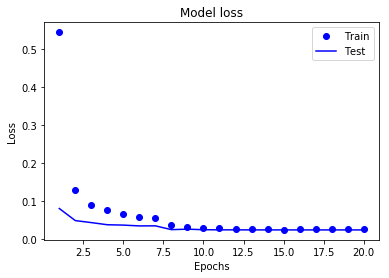

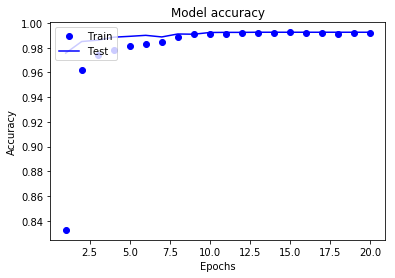

In [24]:
history = hist.history
iter_epochs = len(history['loss'])

def loss_accuracy_plot(iter_epochs, hist_dict):
    print('# Plotting the loss and accuracy metrics')
    epochs = range(1, iter_epochs+1)
    
    loss_values = hist_dict['loss']
    val_loss_values = hist_dict['val_loss']
    acc_values = hist_dict['acc']
    val_acc_values = hist_dict['val_acc']
    
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

    plt.clf()
    
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Model accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

loss_accuracy_plot(iter_epochs, history)

In [25]:
# Final model evaluation
scores = model.evaluate(X_test, Y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 0.75%
